# Лекция 8. Нелинейные модели для классификации

In [61]:
import os
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from math import pi
from math import exp
from csv import reader
from random import seed
from random import randrange
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from matplotlib.colors import ListedColormap
import warnings
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

In [62]:
os.chdir("C:/Users/HP/Documents/analysis/forcasting/data")

## Метод kNN для классификации (распознавание образов с учителем, описание и прогнозирование признака в неметрической шкале)

Теория: 
* Python_i_mashinnoe_obuchenie: с. 103-106 
* ESLII_print12: с. 33-35
* Тетрадь №2: с. 22-32
* https://www.cs.cmu.edu/~./awm/tutorials/overfit10.pdf
* https://machinelearningmastery.com/types-of-classification-in-machine-learning/

Рассмотрим метод kNN в действии.

Загрузим набор данных по ирисам, который включен в модуль datasets библиотеки (пакета) sklearn, вызвав функцию load_iris():

In [63]:
iris_dataset = load_iris()

Получили объект класса Bunch, который похож на словарь, т.к. содержит ключи и значения:

In [64]:
type(iris_dataset)

sklearn.utils.Bunch

Посмотрим ключи полученного объекта:

In [65]:
print("Ключи iris_dataset:\n", iris_dataset.keys())

Ключи iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [66]:
print("Тип массива data:", type(iris_dataset['data']))

Тип массива data: <class 'numpy.ndarray'>


In [67]:
print("Форма массива data:", iris_dataset['data'].shape)

Форма массива data: (150, 4)


Видим, что массив данных data содержит измерения для 150 различных цветков по четырем признакам.

Выведем 5 первых строк массива data:

In [68]:
iris_dataset.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Посмотрим описания признаков:

In [69]:
print("Названия признаков:\n", iris_dataset['feature_names'])

Названия признаков:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Признаки: длина чашелистиков (sepal length), ширина чашелистиков (sepal width), длина лепестков (petal length), ширина лепестков (petal width)

Массив target содержит сведения о сортах уже измеренных цветков, которые также записаны в виде массива NumPy:

In [70]:
print("Тип массива target:", type(iris_dataset['target']))

Тип массива target: <class 'numpy.ndarray'>


Массив target одномерный, содержит по одному элементу (коду) для каждого цветка:

In [71]:
print("Форма массива target:", iris_dataset['target'].shape)

Форма массива target: (150,)


In [72]:
print("Ответы:\n", iris_dataset['target'])

Ответы:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Сорта закодированных ирисов содержатся в массиве target_names:

In [73]:
print("Сорта ирисов:", iris_dataset['target_names'])

Сорта ирисов: ['setosa' 'versicolor' 'virginica']


0-setosa,1-versicolor, 2-virginica.

Вызовем функцию train_test_split для наших данных и зададим обучающие данные (X_train), обучающие метки (y_train), тестовые данные (X_test), тестовые метки (y_test).
Перед разбиением функция train_test_split перемешивает набор данных с помощью генератора псевдослучайных чисел, т.к. все данные отсортированы по меткам.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

В результате 75% данных отнесено к обучающему набору, а 25% - к тестовому.

In [75]:
print("Форма массива X_train:", X_train.shape)
print("Форма массива y_train:", y_train.shape)

Форма массива X_train: (112, 4)
Форма массива y_train: (112,)


In [76]:
print("Форма массива X_test:", X_test.shape)
print("Форма массива y_test:", y_test.shape)

Форма массива X_test: (38, 4)
Форма массива y_test: (38,)


In [77]:
# Преобразуем массив NumPy в массив класса DataFrame.
# Столбцам дадим имена названий признаков.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

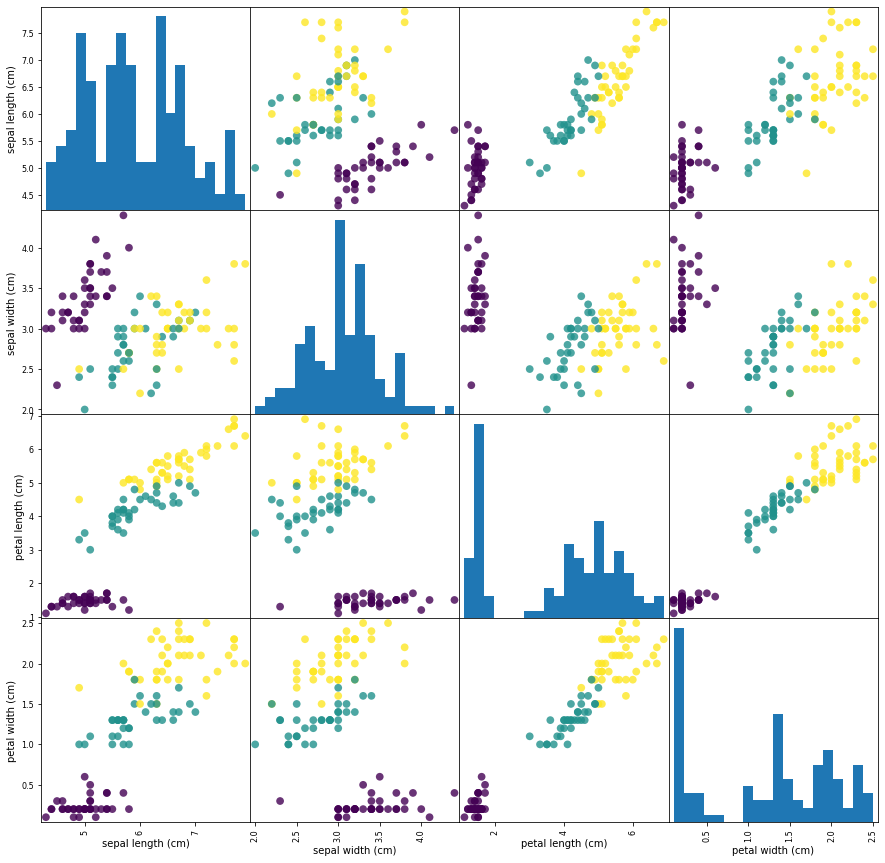

In [78]:
# Построим диаграмму рассеяния для признаков обучающего набора (X_train). 
#Точки данных окрасим в соответствии с сортами ирисов, к которым они относятся (y_train).
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

Из графика видно, что измерения чашелистиков и лепестков, похоже, позволяют относительно хорошо разделить цветки ириса на три класса. Это означает, что модель машинного обучения, вероятно, сможет научиться их разделять.

### Метод k ближайших соседей

Алгоритм классификации на основе метода k ближайших соседей реализован в классификаторе KNeighborsClassifier модуля neighbors в библиотеке sklearn.

Прежде, чем использовать эту модель, нам нужно создать объект - экземпляр данного класса. Это произойдет, когда мы зададим параметры модели, самым важным из которых является количество соседей (k). Установим k равным 1.

In [79]:
knn = KNeighborsClassifier(n_neighbors=1)

Для построения модели на обучающем наборе данных вызываем метод fit объекта knn, который принимает в качестве аргументов массив NumPy X_train, содержащий обучающие данные, и массив NumPy y_train, соответсвующий обучающим меткам.

In [80]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Теперь мы можем получить прогнозы, применив эту модель к новым данным, по которым мы еще не знаем правильные метки.

In [81]:
#Зададим параметры некоторого ириса, сорт которого мы хотим узнать.
X_new = np.array([[5, 2.9, 1, 0.2]])
print("Форма массива X_new:", X_new.shape)

Форма массива X_new: (1, 4)


Чтобы сделать прогноз, вызываем метод predict объекта knn.

In [82]:
prediction = knn.predict(X_new)
print("Прогноз:", prediction)
print("Спрогнозированная метка:",
       iris_dataset['target_names'][prediction])

Прогноз: [0]
Спрогнозированная метка: ['setosa']


Спрогнозируем сорта ирисов для данных тестового набора с помощью модели kNN (n=1).

In [83]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n", y_pred)

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


Оценим качество модели kNN (n=1) на тестовом наборе, вычислив для нее показатель "правильность" (accuracy) - это процент цветков, для которых модель правильно спрогнозировала сорт.

In [84]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.97


In [85]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


Мы получили правильный прогноз для 97% ирисов в тестовом наборе. Это означает, что мы можем ожидать, что наша модель в 97% случаев даст правильный прогноз и для новых ирисов.

Краткий программный код, необходимый для всей процедуры обучения и оценки модели: 

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


Сравнение правильности на обучающем и тестовом наборах как функции от количества соседей.

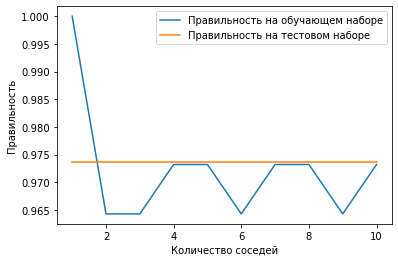

In [87]:
training_accuracy = []
test_accuracy = []
# попробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # строим модель
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # записываем правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train, y_train))
    # записываем правильность на тестовом наборе
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="Правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("Количество соседей")
plt.legend()

# Develop k-Nearest Neighbors in Python From Scratch

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

## Математика для kNN:

Метрики:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html

Расстояние Минковского (частные случаи: евклидово расстояние, манхэттенское расстояние, расстояние Чебышева, расстояние Хэмминга):
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B8%D0%BD%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE

Расстояние городских кварталов:
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2

Косинусное расстояние:
https://en.wikipedia.org/wiki/Cosine_similarity
https://www.machinelearningplus.com/nlp/cosine-similarity/

Bray–Curtis dissimilarity:
https://en.wikipedia.org/wiki/Bray%E2%80%93Curtis_dissimilarity

Расстояние Хэмминга:
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%A5%D1%8D%D0%BC%D0%BC%D0%B8%D0%BD%D0%B3%D0%B0
https://en.wikipedia.org/wiki/Hamming_distance

Коэффициент Жаккара:
https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%96%D0%B0%D0%BA%D0%BA%D0%B0%D1%80%D0%B0
https://en.wikipedia.org/wiki/Jaccard_index

Kulsinski dissimilarity:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.kulsinski.html

Расстояние Махаланобиса:
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B0%D1%85%D0%B0%D0%BB%D0%B0%D0%BD%D0%BE%D0%B1%D0%B8%D1%81%D0%B0
https://en.wikipedia.org/wiki/Mahalanobis_distance

Rogers-Tanimoto dissimilarity: 
https://en.wikipedia.org/wiki/Jaccard_index#Tanimoto_similarity_and_distance
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.rogerstanimoto.html

Distance Measures:
https://www.sequentix.de/gelquest/help/distance_measures.htm

Canberra distance:
https://en.wikipedia.org/wiki/Canberra_distance

Расстояние Чебышёва - частный случай расстояния Минковского:
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2%D0%B0
https://en.wikipedia.org/wiki/Chebyshev_distance

Корреляция:
https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F
https://en.wikipedia.org/wiki/Correlation_coefficient

Sorensen–Dice coefficient:
https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient

Sokal-Michener dissimilarity: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.sokalmichener.html

Sokal-Sneath dissimilarity:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.sokalsneath.html

Yule dissimilarity: 
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.yule.html

## Наивный байесовский классификатор (Naive Bayes Classifier)

Теория: 
* https://arxiv.org/pdf/1410.5329v3.pdf
* ESLII_print12: с. 210-212
* https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
* https://scikit-learn.org/stable/modules/naive_bayes.html

https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

Теорема Байеса обеспечивает способ, которым мы можем вычислить вероятность то, что часть данных принадлежит данному классу, учитывая наши предварительные знания. Теорема Байеса имеет вид:

 * P(класс | данные) = (P (данные | класс) * P (класс)) / P (данные)

где P (class | data) - вероятность класса с учетом предоставленных данных.

Наивный байесовский алгоритм - алгоритм классификации для бинарных (двухклассовых) и мультиклассовых задач классификации. Он называется «Наивный байесовский», потому что вычисления вероятностей для каждого класса упрощены, чтобы сделать их вычисления возможными.

Вместо того, чтобы пытаться вычислить вероятности каждого значения атрибута, они считаются условно независимыми, учитывая значение класса.

Это очень сильное предположение, которое маловероятно для реальных данных. Тем не менее, этот подход на удивление хорошо работает с данными, где это предположение не выполняется.

## Набор данных об ирисах

Набор данных об ирисах включает прогнозирование видов ирисов по измерениям цветков ириса.

Это проблема мультиклассовой классификации. Количество наблюдений для каждого класса сбалансировано. Есть 150 наблюдений с 4 входными переменными и 1 выходной переменной. Имена переменных следующие:
* Длина перегородки в см.
* Ширина перегородки в см.
* Длина лепестка в см.
* Ширина лепестка в см.
* Класс ириса

Сначала мы разработаем каждый фрагмент алгоритма в этом разделе, а затем свяжем все элементы вместе в рабочую реализацию, примененную к реальному набору данных в следующем разделе.

Мы пройдем 5 шагов:
* Шаг 1: Разбивка данных на классы.
* Шаг 2: Обобщение набора данных.
* Шаг 3: Обобщение данных по классам.
* Шаг 4: Гауссовская функция плотности вероятности.
* Шаг 5: Вероятности классов.

Эти шаги обеспечат основу, необходимую для реализации наивного метода Байеса с нуля и применения его к собственным задачам прогнознирования и моделирования.

### Шаг 1: Разбивка данных на классы

Нам нужно будет рассчитать вероятность данных по классу, к которому они принадлежат, так называемый базовый уровень.

Это означает, что сначала нам нужно будет разделить обучающую выборку на классы. Относительно простая операция.

Мы можем создать объект словаря, в котором каждый ключ является значением класса, а затем добавить список всех записей в качестве значения в словаре.

Ниже приведена функция с именем separate_by_class(), которая реализует этот подход. Предполагается, что последний столбец в каждой строке является значением класса.

In [88]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

Мы можем создать небольшой набор данных для проверки этой функции. Также мы можем визуализировать этот набор данных и использовать отдельные цвета для каждого класса. Собрав все это вместе, мы можем протестировать нашу функцию separate_by_class() на надуманном наборе данных.

In [89]:
# Test separating data by class
dataset = [[3.393533211,2.331273381,0],
    [3.110073483,1.781539638,0],
    [1.343808831,3.368360954,0],
    [3.582294042,4.67917911,0],
    [2.280362439,2.866990263,0],
    [7.423436942,4.696522875,1],
    [5.745051997,3.533989803,1],
    [9.172168622,2.511101045,1],
    [7.792783481,3.424088941,1],
    [7.939820817,0.791637231,1]]
separated = separate_by_class(dataset)
for label in separated:
    print(label)
    for row in separated[label]:
        print(row)

0
[3.393533211, 2.331273381, 0]
[3.110073483, 1.781539638, 0]
[1.343808831, 3.368360954, 0]
[3.582294042, 4.67917911, 0]
[2.280362439, 2.866990263, 0]
1
[7.423436942, 4.696522875, 1]
[5.745051997, 3.533989803, 1]
[9.172168622, 2.511101045, 1]
[7.792783481, 3.424088941, 1]
[7.939820817, 0.791637231, 1]


Выполнение примера сортирует наблюдения в наборе данных по значению их класса, а затем печатает значение класса, за которым следуют все идентифицированные записи.

Далее мы можем приступить к разработке функций, необходимых для сбора статистики.

## Шаг 2: Обобщение набора данных

Нам нужны две статистики из данного набора данных.

Мы увидим, как эти статистики используются для вычисления вероятностей через несколько шагов. Две статистики, которые нам требуются из данного набора данных, - это среднее значение и стандартное отклонение (среднее отклонение от среднего).

Среднее значение может быть рассчитано как:

* среднее = сумма (x) / n 

где x - это список значений или столбец, который мы ищем;
n - число наблюдений в столбце x.

Ниже приведена небольшая функция с именем mean(), которая вычисляет среднее из списка чисел.

In [90]:
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))

Стандартное отклонение выборки рассчитывается как среднее отличие от среднего значения. Это можно сделать так:

* standard deviation = sqrt((sum i to N (x_i – mean(x))^2) / N-1)

Вы можете видеть, что мы возводим в квадрат разницу между заданным значением и средним, вычисляем среднеквадратичную разницу из среднего значения, а затем берем квадратный корень, чтобы вернуть единицы измерения к их первоначальному виду.

Ниже приведена небольшая функция standard_deviation (), которая вычисляет стандартное отклонение списка чисел.

In [91]:
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

Нам необходимо рассчитать статистику среднего и стандартного отклонения для каждого признака, или каждого столбца наших данных.

Мы можем сделать это, собрав все значения для каждого столбца в список и вычислив среднее и стандартное отклонение в этом списке. После расчета мы можем собрать статистику в список или кортеж статистики. Затем повторить эту операцию для каждого столбца в наборе данных и вернуть список наборов статистики.

Ниже приведена функция sumrize_dataset (), которая реализует этот подход. Он использует некоторые приемы Python, чтобы сократить количество требуемых строк.

In [92]:
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

Первый прием - использование функции zip (), которая будет агрегировать элементы из каждого предоставленного аргумента. Мы передаем набор данных в функцию zip () с оператором *, который разделяет набор данных (то есть список списков) на отдельные списки для каждой строки. Затем функция zip () выполняет итерацию по каждому элементу каждой строки и возвращает столбец из набора данных в виде списка чисел. Умный маленький трюк.

Затем мы вычисляем среднее значение, стандартное отклонение и количество строк в каждом столбце. Из этих 3 чисел создается кортеж, и список этих кортежей сохраняется. Затем мы удаляем статистику для переменной "класс", поскольку она нам не понадобится.

Давайте проверим все эти функции на нашем выдуманном наборе данных. 

In [93]:
summary = summarize_dataset(dataset)
print(summary)

[(5.178333386499999, 2.7665845055177263, 10), (2.9984683241, 1.218556343617447, 10)]


При выполнении примера выводится список кортежей статистики по каждой из двух входных переменных.

Интерпретируя результаты, мы видим, что среднее значение X1 составляет 5,178, а стандартное отклонение X1 составляет 2,767.

Теперь мы готовы использовать эти функции для каждой группы строк в нашем наборе данных.

## Шаг 3: Обобщение данных по классам

Нам нужна статистика для нашего учебного набора данных, организованная по классам.

Выше мы разработали функцию separate_by_class() для разделения набора данных на строки по классам. И мы разработали функцию sumrize_dataset () для вычисления сводной статистики для каждого столбца.

Мы можем собрать все это вместе и суммировать столбцы в наборе данных, упорядоченные по значениям классов.

Ниже приведена функция sumrize_by_class (), которая реализует эту операцию. Набор данных сначала разделяется по классам, а затем статистика рассчитывается для каждого подмножества. Результаты в виде списка кортежей статистики затем сохраняются в словаре по значению их класса.

In [94]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

Проверим работу этой функции на нашем примере.

In [95]:
summary = summarize_by_class(dataset)
for label in summary:
    print(label)
    for row in summary[label]:
        print(row)

0
(2.7420144012, 0.9265683289298018, 5)
(3.0054686692, 1.1073295894898725, 5)
1
(7.6146523718, 1.2344321550313704, 5)
(2.9914679790000003, 1.4541931384601618, 5)


Выполнение этого примера вычисляет статистику для каждой входной переменной и печатает ее, упорядоченную по значению класса. Интерпретируя результаты, мы видим, что значения X1 для строк для класса 0 имеют среднее значение 2,74.

Есть еще одна часть, которая нам нужна, прежде чем мы начнем вычислять вероятности.

## Шаг 4: Гауссовская функция плотности вероятности

Вычислить вероятность какого-нибудь наблюдения, например, X1 сложно.

Один из способов сделать это - предположить, что значение X1 взято из нормально распределенной выборки, имеющую гауссовскую функцию плотности вероятности.

Гауссовское распределение можно описать, используя только два числа: среднее значение и стандартное отклонение. Таким образом, с небольшими расчетами, мы можем оценить вероятность данного значения. Гауссовская функция плотности вероятности имеет следующий вид:

* f(x) = (1 / sqrt(2 * PI) * sigma) * exp(-((x-mean)^2 / (2 * sigma^2)))

где sigma - стандартное отклонение для x, mean - это среднее для x, а PI - значение пи.

Ниже приведена функция, которая реализует это. 

In [96]:
# Example of Gaussian PDF
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

Давайте проверим, как это работает.

In [97]:
# Test Gaussian PDF
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

0.3989422804014327
0.24197072451914337
0.24197072451914337


Запуск кода выводит вероятность некоторых входных значений. Вы можете видеть, что когда значение равно 1, а среднее значение и стандартное отклонение равно 1, наш вход является наиболее вероятным (верхняя часть кривой колокола) и имеет вероятность 0,39.

Можно видеть, что когда мы сохраняем статистику одинаковой и меняем значение x на 1 стандартное отклонение по обе стороны от среднего значения (2 и 0 или одинаковое расстояние по обе стороны от кривой колокола), вероятности этих входных значений одинаковы и составляют 0,24.

Теперь, когда у нас есть все части, давайте посмотрим, как мы можем вычислить вероятности, которые нам нужны для наивного байесовского классификатора.

## Шаг 5: Вероятности классов

Теперь пришло время использовать статистику, рассчитанную на основе наших обучающих данных, для расчета вероятностей новых данных.

Вероятности рассчитываются отдельно для каждого класса. Это означает, что мы сначала вычисляем вероятность того, что новый фрагмент данных принадлежит первому классу, затем вычисляем вероятности того, что он принадлежит второму классу и так далее для всех классов.

Вероятность того, что часть данных принадлежит классу, рассчитывается следующим образом:

* P (класс | данные) = P (X | класс) * P (класс)

Вы можете заметить, что такая запись отличается от теоремы Байеса, описанной выше.

Деление было удалено, чтобы упростить расчет.

Это означает, что результат больше не является строго вероятностью данных принадлежать классу. Это обычное упрощение реализации, поскольку мы часто больше заинтересованы в предсказании классов, чем в вероятности. Прогнозируется тот класс, для которого вычисленная функция принимает наибольшее значение.

Входные переменные обрабатываются отдельно, давая технике название «наивный». Для приведенного выше примера, где у нас есть 2 входные переменные, вычисление вероятности того, что строка принадлежит первому классу 0, может быть вычислено так:

* P (класс = 0 | X1, X2) = P (X1 | класс = 0) * P (X2 | класс = 0) * P (класс = 0)

Теперь вы можете понять, почему нам нужно разделить данные по классам. 

Ниже приведена функция с именем Calculate_class_probabilities (), которая связывает все это вместе.

Она принимает набор вычисленных статистик и новую строку в качестве входных аргументов.

Сначала рассчитываются вероятности данного класса, или P (класс), как отношения строк с данным классом ко всем строкам в данных обучения.

Затем, вероятности рассчитываются для каждого входного значения в строке, используя гауссовскую функцию плотности вероятности и статистику для этого столбца и этого класса. Вероятности умножаются вместе по мере накопления.

Этот процесс повторяется для каждого класса в наборе данных.

Наконец, возвращается словарь вероятностей с одной записью для каждого класса.

In [98]:
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, count = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

Давайте свяжем это с нашим выдуманным набором данных.

Приведенный ниже код сначала вычисляет сводную статистику по классам для набора обучающих данных, а затем использует эту статистику для вычисления вероятности первой записи, принадлежащей каждому классу.

In [99]:
# Example of calculating class probabilities
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

# Test calculating class probabilities
dataset = [[3.393533211,2.331273381,0],
    [3.110073483,1.781539638,0],
    [1.343808831,3.368360954,0],
    [3.582294042,4.67917911,0],
    [2.280362439,2.866990263,0],
    [7.423436942,4.696522875,1],
    [5.745051997,3.533989803,1],
    [9.172168622,2.511101045,1],
    [7.792783481,3.424088941,1],
    [7.939820817,0.791637231,1]]
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[0])
print(probabilities)

{0: 0.05032427673372076, 1: 0.00011557718379945765}


При выполнении кода выводятся вероятности, рассчитанные для каждого класса.

Мы можем видеть, что вероятность того, что первая строка принадлежит классу 0 (0,0503), выше, чем вероятность того, что она принадлежит классу 1 (0,0001). Поэтому мы делаем правильный вывод, что она принадлежит классу 0.

Теперь, когда мы увидели, как реализовать алгоритм Наивного Байеса, давайте применим его к набору данных об Ирисах.

## Исследование набора данных об ирисах

Первым шагом является загрузка набора данных и преобразование загруженных данных в числа, которые мы можем использовать для вычисления среднего и стандартного отклонения. Для этого мы будем использовать вспомогательную функцию load_csv () для загрузки файла, str_column_to_float () для преобразования в числа с плавающей точкой и str_column_to_int () для преобразования столбца класса в целочисленные значения.

Мы оценим алгоритм с использованием k-кратной перекрестной проверки, где k возьмем равным 5. Это означает, что 150/5 = 30 записей будут в каждом наборе. Мы будем использовать вспомогательные функции evaluate_algorithm() для оценки алгоритма с помощью перекрестной проверки и precision_metric () для вычисления точности прогнозов.

Была разработана новая функция predict() для вычисления вероятности новой строки принадлежать каждому классу, и выбора класса с наибольшим значением вероятности.

Еще одна новая функция, названная naive_bayes (), была разработана для применения алгоритма Наивного Байеса, которая изучает статистику из обучающего набора данных и использует ее для составления прогнозов для тестового набора данных.

Полный пример приведен ниже.

In [100]:
# Naive Bayes On The Iris Dataset
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

# Naive Bayes Algorithm
def naive_bayes(train, test):
    summarize = summarize_by_class(train)
    predictions = list()
    for row in test:
        output = predict(summarize, row)
        predictions.append(output)
    return(predictions)

# Test Naive Bayes on Iris Dataset
seed(1)

filename = 'iris.csv'
dataset = load_csv(filename)[1:]
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
scores = evaluate_algorithm(dataset, naive_bayes, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [93.33333333333333, 96.66666666666667, 100.0, 93.33333333333333, 93.33333333333333]
Mean Accuracy: 95.333%


При выполнении кода выводятся средние оценки точности классификации на каждом перекрестном этапе проверки, а также средний показатель точности.

Мы можем видеть, что средняя точность около 95% значительно лучше, чем базовая точность в 33%.

Мы можем подогнать модель по всему набору данных, а затем использовать модель для прогнозирования новых наблюдений (рядов данных).

Например, модель - это просто набор вероятностей, рассчитанный с помощью функции sumrize_by_class ().

In [101]:
# fit model
model = summarize_by_class(dataset)

После подгонки мы можем использовать модель при вызове функции predict() со строкой, представляющей наше новое наблюдение, для прогнозирования метки класса.

Мы также хотели бы знать метку класса для прогноза. Мы можем обновить функцию str_column_to_int (), чтобы печатать сопоставление имен классов строк с целыми числами, чтобы мы могли интерпретировать прогноз по модели.

Связав это вместе, полный пример подгонки наивной байесовской модели ко всему набору данных и создания прогноза для нового наблюдения приведен ниже.

In [102]:
# Make Predictions with Naive Bayes On The Iris Dataset
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
        print('[%s] => %d' % (value, i))
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

# Make a prediction with Naive Bayes on Iris Dataset
filename = 'iris.csv'
dataset = load_csv(filename)[1:]
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# fit model
model = summarize_by_class(dataset)
# define a new record
row = [5.7,2.9,4.2,1.3]
# predict the label
label = predict(model, row)
print('Data=%s, Predicted: %s' % (row, label))

[Iris-virginica] => 0
[Iris-setosa] => 1
[Iris-versicolor] => 2
Data=[5.7, 2.9, 4.2, 1.3], Predicted: 2


## Naive Bayes in scikit-learn

In [103]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


In [104]:
#Прогнозный класс для тестового набора
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

Оценка точности модели.

In [105]:
print('Правильность на обучающем наборе: {:.2f}'.format(gnb.fit(X_train, y_train).score(X_train, y_train)))

Правильность на обучающем наборе: 0.97


In [106]:
print('Правильность на тестовом наборе: {:.2f}'.format(gnb.fit(X_test, y_test).score(X_test, y_test)))

Правильность на тестовом наборе: 0.95


## Деревья решений для классификации

Теория: 
* Python_i_mashinnoe_obuchenie: с. 93-103 
* ESLII_print12: с. 305-317
* Тетрадь №2: с. 33-45
* https://medium.com/diogo-menezes-borges/a-breath-of-fresh-air-with-decision-trees-e660455bbfc8
* https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
* [A._Myuller,_S._Gvido]_Vvedenie_v_mashinnoe_obuche - с. 85-100

Импортируем набор данных

In [107]:
iris_dataset = load_iris()

Разобьем данные на обучающую и тестовую части.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

Вызовем функцию DecisionTreeClassifier из модуля tree библиотеки (пакета) sklearn. 

Теперь обучаем на наборе данных об ирисах классификатор класса DecisionTreeClassifier.

In [109]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.974


Чистые (необрезанные) деревья склонны к переобучению и плохо обобщают результат на новые данные. Поэтому ограничивают глубину дерева, что приводит к более низкой правильности на обучающем наборе, но улучшает правильность на тестовом наборе.

In [110]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.982
Правильность на тестовом наборе: 0.974


In [111]:
#Зададим параметры некоторого ириса, сорт которого мы хотим узнать.
X_new = np.array([[5, 2.9, 1, 0.2]])
print("Форма массива X_new:", X_new.shape)

Форма массива X_new: (1, 4)


Чтобы сделать прогноз, вызываем метод predict объекта tree.

In [112]:
prediction = tree.predict(X_new)
print("Прогноз:", prediction)
print("Спрогнозированная метка:",
       iris_dataset['target_names'][prediction])

Прогноз: [0]
Спрогнозированная метка: ['setosa']


## Визуализация дерева решений в Python

### Построение границ решения дерева решений

Деревья решений могут создавать сложные границы решения путем деления пространства
признаков на прямоугольники. Однако мы должны быть осторожными,
поскольку чем глубже дерево решений, тем сложнее становится граница решения,
что может легко закончиться переобучением. Теперь, используя scikit - learn, натренируем дерево решений с максимальной глубиной 3, применив в качестве критерия
неоднородности энтропию. Хотя для целей визуализации может понадобиться
шкалирование признаков, отметим, что масштабирование признаков не является
необходимой составной частью алгоритмов деревьев решений. Соответствующий
исходный код выглядит следующим образом:

In [113]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

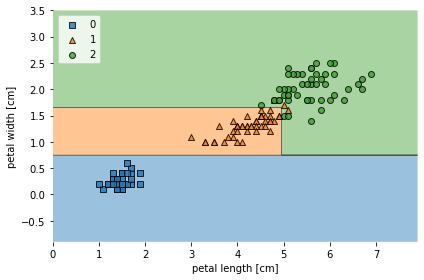

In [115]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      clf=tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

После выполнения приведенного выше примера получаем типичные ось - параллельные границы решения дерева решений.

### Построение дерева решений

In [116]:
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

In [117]:
#!dot -Tpng -o tree.png tree.dot

В результате, в рабочей папке появился png файл с изображением дерева решений.

In [118]:
#conda install -c anaconda graphviz

In [119]:
#pip install pydotplus

In [120]:
dot_data = export_graphviz(
        tree, 
        out_file=None,
        # the parameters below are new in sklearn 0.18
        feature_names=['petal length', 'petal width'],  
        class_names=['setosa', 'versicolor', 'virginica'],  
        filled=True,
        rounded=True)

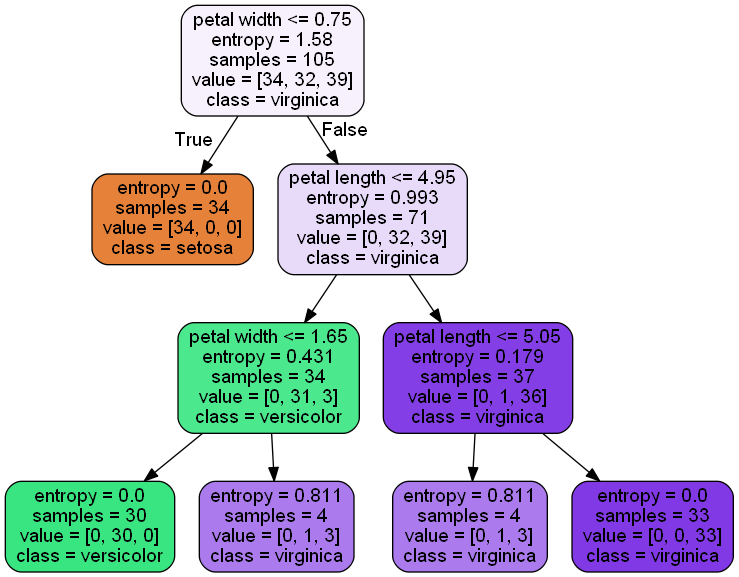

In [121]:
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

Анализируя дерево решений, которое мы создали при помощи программы GгaphViz, теперь можно удобным образом проследить расщепления, которые дерево решений определило, исходя из нашего тренировочного набора данных. Начав со 105 образцов в корне, мы расщепили его на два дочерних узла с 34 и 71 образцами каждое, используя точку отсечения с шириной лепестка <= 0.75 см. После первого расщепления мы видим, что левый дочерний узел уже однороден и содержит только образцы из класса ириса щетинистого (энтропия = О). Затем дальнейшие расщепления с правой стороны используются для разделения образцов из классов ириса разноцветного и ириса виргинского.

# How To Implement The Decision Tree Algorithm From Scratch In Python

https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/